<a href="https://colab.research.google.com/github/amitjslearn/stock_price_prediction/blob/master/new_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load


In [0]:
# Importing the training set
dataset_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Google_Stock_Price_Train.csv'); dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
5,1/10/2012,313.70,315.72,307.30,621.43,"8,824,000"
6,1/11/2012,310.59,313.52,309.40,624.25,"4,817,800"
7,1/12/2012,314.43,315.26,312.08,627.92,"3,764,400"
8,1/13/2012,311.96,312.30,309.37,623.28,"4,631,800"
9,1/17/2012,314.81,314.81,311.67,626.86,"3,832,800"


In [0]:
training_set = dataset_train.iloc[:, 1:2].values; training_set.shape

(1258, 1)

In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1)); sc

MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
training_set_scaled = sc.fit_transform(training_set);training_set_scaled.shape

(1258, 1)

In [0]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
X_train.shape

(1198, 60)

In [0]:
y_train.shape


(1198,)

In [0]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [0]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
#X_train

In [0]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
#erroe

In [0]:
# Initialising the RNN
regressor = Sequential()

In [0]:
regressor

In [0]:
X_train[1]

array([[0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225],
       [0.0643277 ],
       [0.0585423 ],
       [0.06568569],
       [0.06109085],
       [0.06639259],
       [0.0614257 ],
       [0.07474514],
       [0.02797827],
       [0.02379269],
       [0.02409033],
       [0.0159238 ],
       [0.01078949],
       [0.00967334],
       [0.01642607],
       [0.02100231],
       [0.02280676],
       [0.02273235],
       [0.02810849],
       [0.03212665],
       [0.0433812 ],
       [0.04475779],
       [0.04790163],
       [0.0440695 ],
       [0.04648783],
       [0.04745517],
       [0.04873875],
       [0.03936305],
       [0.04137213],
       [0.04034898],
       [0.04784582],
       [0.04325099],
       [0.04356723],
       [0.04286033],
       [0.04602277],
       [0.05398467],
       [0.05738894],
       [0.05714711],
       [0.05569611],
       [0.04421832],
       [0.04514845],
       [0.04605997],
       [0.04412531],
       [0.03675869],
       [0.044

In [0]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [0]:
#error

In [0]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)               

In [0]:
# Fitting the RNN to the Training set6
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0668
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0069
Epoch 3/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0049
Epoch 4/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0048
Epoch 5/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0051
Epoch 6/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0051
Epoch 7/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0054
Epoch 8/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0043
Epoch 9/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0042
Epoch 11/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0038
Epoch 12/100
1198/1198 [==============================] - 6s 5ms/step - lo

/usr/local/lib/python3.6/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.195101). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


1198/1198 [==============================] - 6s 5ms/step - loss: 0.0025
Epoch 43/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0024
Epoch 44/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0024
Epoch 45/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0027
Epoch 46/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0023
Epoch 47/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0025
Epoch 48/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0023
Epoch 49/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0025
Epoch 50/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0024
Epoch 51/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0026
Epoch 52/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0021
Epoch 53/100
1198/1198 [==============================] - 6s 5ms/step - loss: 

In [0]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values

In [0]:
inputs = inputs.reshape(-1,1); inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [0]:
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

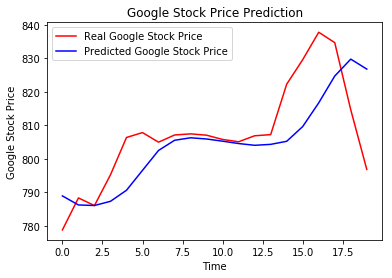

In [0]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [0]:
stop here

In [0]:
#!pip3 install ann_visualizer

In [0]:
#!pip3 install graphviz

In [0]:
#!conda install -c conda-forge ann_visualizer

from ann_visualizer.visualize import ann_viz
ann_viz(regressor, title="My first neural network")

import dill
dill.dump_session('notebook_env.db')

In [0]:
filename = '/content/drive/My Drive/Colab Notebooks/new_model.sav'
dump(regressor,filename)

['/content/drive/My Drive/Colab Notebooks/new_model.sav']

In [0]:
# load the model from disk
loaded_model = load(filename)

In [0]:
print(loaded_model)

In [0]:
predicted_stock_price_loaded = loaded_model.predict(X_test)
predicted_stock_price_loaded = sc.inverse_transform(predicted_stock_price_loaded)

'TPU  Stock Price Prediction'

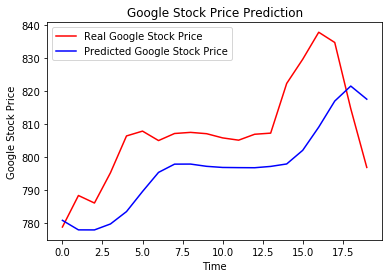

In [0]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price_loaded, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('TPU  Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [0]:
%who

Dense	 Dropout	 LSTM	 MinMaxScaler	 Sequential	 X_test	 X_train	 dataset_test	 dataset_total	 
dataset_train	 drive	 dump	 filename	 i	 inputs	 load	 loaded_model	 np	 
pd	 plt	 predicted_stock_price	 predicted_stock_price_loaded	 real_stock_price	 regressor	 sc	 training_set	 training_set_scaled	 
y_train	 
